**Pour La loi exponentielle :**

**Estimateur empirique**

0.6666666666666667


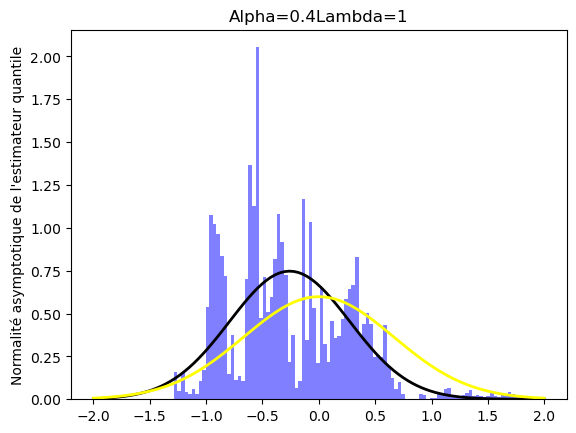

In [320]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats
import decimal
import time


n=10000

X = np.random.exponential(1/beta,size=n)

#Paramètre de l'ordre du quantile
alpha = 0.1
beta=1
strAlpha=str(alpha)
strLambda=str(beta)
# Générer les variables aléatoires iid



# Calculer le quantile empirique
q = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/beta #quantile d'ordre alpha


for i in range(1,n):
    q[i] = sorted(X[:i+1])[int(alpha*i)+1]
    a[i] = math.sqrt(i)*(q[i]-y)
    
#Tracer la convergence presque sûre

#plt.plot(q)
#plt.axhline(y, color='r', linestyle='--')
#plt.xlabel('n')
#plt.ylabel('Alpha='+strAlpha)
#plt.title('Lambda='+strLambda)
#plt.show()



plt.hist(a, bins=100, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*(1-alpha)*math.exp(2*beta*y)/(beta**2)
print(ecarttype)
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0,  linewidth=2,color='yellow')




plt.xlabel("")
plt.ylabel('Normalité asymptotique de l\'estimateur quantile')
plt.title('Alpha='+strAlpha+'Lambda='+strLambda)

plt.show() 



**Estimateur Stochastique Robbins Monro**

0.5108256237659907
1.2000000000000002


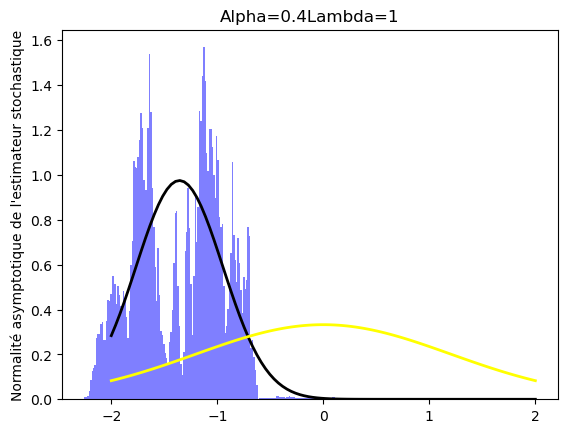

1.2000000000000002
0.40922451927930004


In [349]:

beta=1
alpha=0.1
n=2000000

X = np.random.exponential(1/beta,size=n)

strAlpha=str(alpha)
strLambda=str(beta)

# Calculer le quantile empirique
q = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/beta
for i in range(1,n-1):
    if X[i+1]<q[i]:
        q[i+1] = q[i]-(1/i)*(1-alpha)
    else:
        q[i+1] = q[i]-(1/i)*(-alpha)
    a[i] = math.sqrt(i)*(q[i]-y)
    
    
# Tracer la convergence presque sûre
#y=np.percentile(X, alpha*100)

y=-math.log(1-alpha)/beta
print(y)
#plt.plot(q)
#plt.axhline(y, color='r', linestyle='--')
#plt.xlabel('n')
#plt.ylabel('Quantile empirique')
#plt.title('Convergence presque sûre du quantile empirique')
#plt.show()

plt.hist(a, bins=200, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*(1-alpha)/(2*beta*math.exp(-beta*y)-1)
print(ecarttype)
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0,  linewidth=2,color='yellow')




plt.xlabel("")
plt.ylabel('Normalité asymptotique de l\'estimateur stochastique')
plt.title('Alpha='+strAlpha+'Lambda='+strLambda)


plt.show()
print(ecarttype)
print(np.std(a))

**Estimateur plus réaliste**

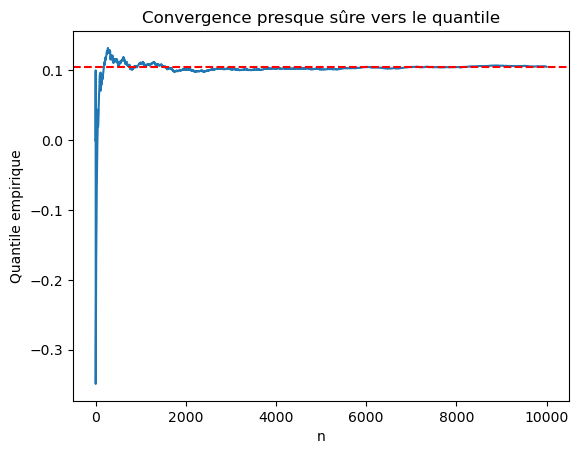

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


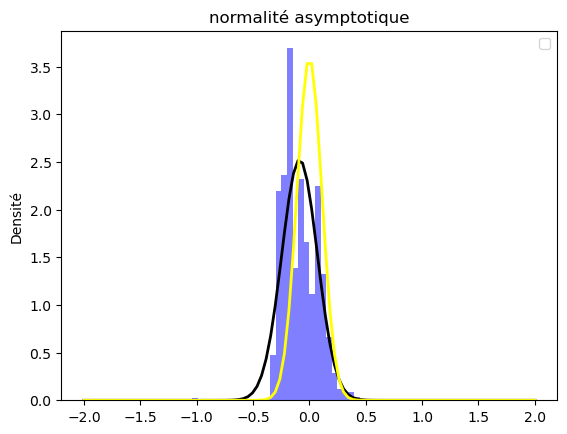

In [360]:
n=10000

#Paramètre de l'ordre du quantile
alpha = 0.1
beta=1

p=1/4
q=1/2
phi=0
strp=str(p)
strq=str(q)

def K(h):
    sig=1
    K=1/(math.sqrt(2*math.pi))
    K=K*math.exp(-((h**2)/2))
    return K
# Générer les variables aléatoires iid
X = np.random.exponential(1/beta,size=n)


# Calculer le quantile empirique
thet = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/beta #quantile d'ordre alpha


for i in range(1,n-1):
    if X[i+1]<thet[i]:
        ind = 1
    else:
        ind = 0
    thet[i+1] = thet[i] - ( (1/i) * (1/ (phi + (1/i)**p ) ) ) * (ind - alpha )
    phi = (1-1/i)*phi + (1/i)*((i+1)**q)*K((thet[i]-X[i+1])*(i+1)**q)
    a[i] = math.sqrt(i)*(thet[i]-y)
    
# Tracer la convergence presque sûre

plt.plot(thet)
plt.axhline(y, color='r', linestyle='--')
plt.xlabel('n')
plt.ylabel('Quantile empirique')
plt.title('Convergence presque sûre vers le quantile')
plt.show()

plt.hist(a, bins=30, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)

p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*((1-alpha)*(math.exp(2*beta*y)))/beta**2
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0, linewidth=2,color='yellow')



plt.xlabel("")
plt.ylabel("Densité")
plt.title("normalité asymptotique")
plt.legend()


plt.show()

**La décroissance des erreurs quadratiques moyennes:**

**1.Pour Theta barre(estimateur empirique)**

In [ ]:
alpha = 0.1 # l'ordre alpha
beta=1      # parametre de la distribution exponentielle


y=-math.log(1-alpha)/beta #quantile theorique


Taillen = [i*100 for i in range(1,500,10)]  # liste dont on met les tailles des echantillons


Err = []

for n in Taillen:
    
    

    X = np.random.exponential(1/beta,size=n) #géner n echantillons
    
    q = np.zeros(n)
    
    for j in range(1,n):
        q[j] = np.sort((X[:j+1]))[int(alpha*j)+1] #calcul de quantile empirique
    

    Err0 = np.mean((q - y)**2) 
    

    Err.append(Err0)


plt.plot(Taillen, Err)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Erreur quadratique moyenne')
plt.show()



**2.Pour Theta chapeau ( estimateur stochastique Robbins Monro)**

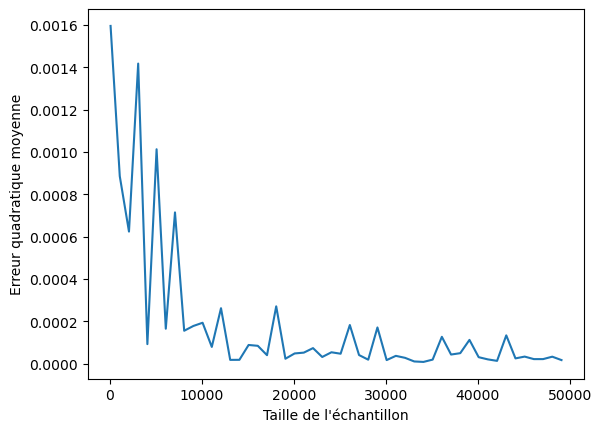

In [367]:
alpha = 0.1 # l'ordre alpha
beta=1      # parametre de la distribution exponentielle


y=-math.log(1-alpha)/beta #quantile theorique


Taillen = [i*100 for i in range(1,500,10)]  # liste dont on met les tailles des echantillons


Err = []

for n in Taillen:
    
    

    X = np.random.exponential(1/beta,size=n) #géner n echantillons
    
    q = np.zeros(n)
    
    for j in range(1,n-1):
            if X[j+1]<q[j]:
                q[j+1] = q[j]-(1/j)*(1-alpha)
            else:
                q[j+1] = q[j]-(1/j)*(-alpha)
    

    Err0 = np.mean((q - y)**2) 
    

    Err.append(Err0)


plt.plot(Taillen, Err)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

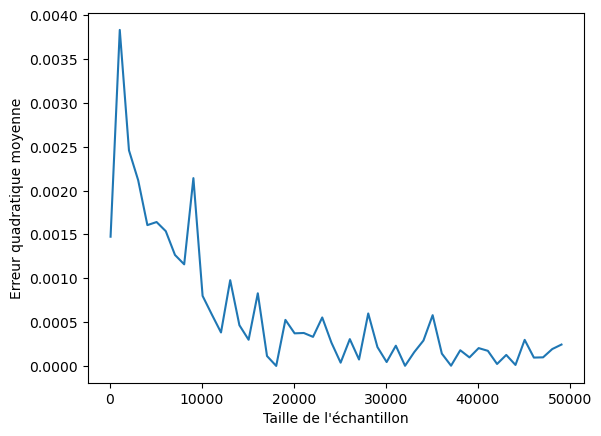

In [370]:
alpha = 0.1 # l'ordre alpha
beta=1      # parametre de la distribution exponentielle


p=1/4
q=1/2
phi=0
strp=str(p)
strq=str(q)

def K(h):
    sig=1
    K=1/(math.sqrt(2*math.pi))
    K=K*math.exp(-((h**2)/2))
    return K


y=-math.log(1-alpha)/beta #quantile theorique


Taillen = [i*100 for i in range(1,500,10)]  # liste dont on met les tailles des echantillons


Err = []

for n in Taillen:
    
    

    X = np.random.exponential(1/beta,size=n) #géner n echantillons
    
    thet = np.zeros(n)
    
    for j in range(1,n-1):
            if X[j+1]<thet[j]:
                ind = 1  #indicatrice
            else:
                ind = 0  #indicatrice
            thet[j+1] = thet[j] - ( (1/j) * (1/ (phi + (1/j)**p ) ) ) * (ind - alpha )
            phi = (1-1/j)*phi + (1/j)*((i+1)**q)*K((thet[j]-X[j+1])*(j+1)**q)
            

    Err0 = np.mean((thet - y)**2) 
    

    Err.append(Err0)


plt.plot(Taillen, Err)
plt.xlabel('Taille de l\'échantillon')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

**Loi de Pareto**

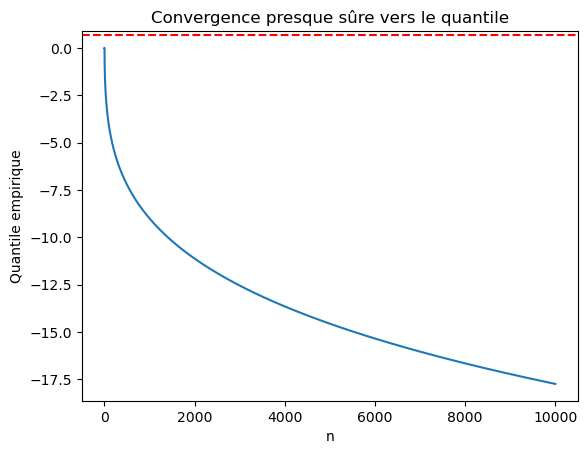

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


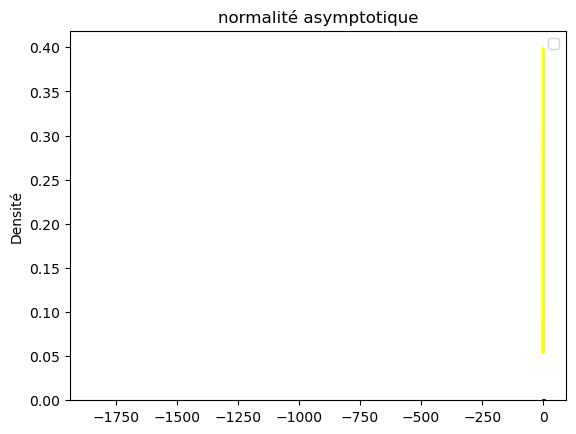

In [190]:
n=10000

#Paramètre de l'ordre du quantile
alpha = 0.5
beta=1

p=1/4
q=1/2
phi=0

def K(h):
    sig=1
    K=1/(math.sqrt(2*math.pi))
    K=K*math.exp(-((h**2)/2))
    return K
# Générer les variables aléatoires iid
X = np.random.exponential(1/beta,size=n)


# Calculer le quantile empirique
thet = np.zeros(n)
a = np.zeros(n)
#y=np.percentile(X, alpha*100)
y=-math.log(1-alpha)/b #quantile d'ordre alpha


for i in range(1,n-1):
    if X[i+1]<thet[i]:
        ind = 1
    else:
        ind = 0
    thet[i+1] = thet[i] - ( (1/i) * (1/ (phi + (1/i)**p ) ) ) * (1 - alpha )
    phi = (1-1/i)*phi + (1/i)*((i+1)**q)*K((thet[i]-X[i+1])*(i+1)**q)
    a[i] = math.sqrt(i)*(thet[i]-y)
    
# Tracer la convergence presque sûre

plt.plot(thet)
plt.axhline(y, color='r', linestyle='--')
plt.xlabel('n')
plt.ylabel('Quantile empirique')
plt.title('Convergence presque sûre vers le quantile')
plt.show()

plt.hist(a, bins=30, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)

p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*((1-alpha)*(math.exp(2*beta*y)))/beta**2
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0, linewidth=2,color='yellow')



plt.xlabel("")
plt.ylabel("Densité")
plt.title("normalité asymptotique")
plt.legend()


plt.show()

**Loi de Pareto!!!!!**

In [ ]:
n=5000
alpha = 0.1
debut=time.time()
#Paramètre de l'ordre du quantile
d= 2 #pram d'echelle dans l'énoncé c'est 'b'
b=1 # param de forme dans l'énoncé c'est 'a'

# Générer les variables aléatoires iid
X = np.random.pareto(b,size=n)*d


# Calculer le quantile empirique
q = np.zeros(n)
a=np.zeros(n)

yt=d*((1-alpha)**(-1/b))

for i in range(1,n):
    q[i] = sorted(X[:i+1])[int(alpha*i)+1]
    a[i] = math.sqrt(i)*(q[i]-yt)
    


plt.hist(a, bins=30, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(min(a), max(a), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*(1-alpha)/((b*(d**b*(yt**(b+1))))**2)
p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0, linewidth=2,color='yellow')
print(ecarttype)
plt.xlabel("")
plt.ylabel("Densité")
plt.title("normalité asymptotique")
plt.legend()

plt.show()

fin=time.time()

print(fin-debut)

In [ ]:
n=10000
alpha = 0.7
debut=time.time()
#Paramètre de l'ordre du quantile
d= 2 #b
b=1.5 #a

# Générer les variables aléatoires iid
X = np.random.pareto(b,size=n)*d


# Calculer le quantile empirique
q = np.zeros(n)
a= np.zeros(n)
y=np.percentile(X, alpha*100)
yt=d*((1-alpha)**(-1/b))

for i in range(1,n-1):
    if X[i+1]<q[i]:
        q[i+1] = q[i]-(1/i)*(1-alpha)
    else:
        q[i+1] = q[i]-(1/i)*(-alpha)
        
    a[i] = math.sqrt(i)*(q[i]-yt)
    
# Tracer la convergence presque sûre
#y=np.percentile(X, alpha*100)
plt.plot(q)
plt.axhline(y, color='r', linestyle='--')
plt.axhline(yt, color='yellow', linestyle='--')
plt.xlabel('n')
plt.ylabel('Quantile empirique')
plt.title('Convergence presque sûre du quantile empirique')
plt.ylim(0,yt+0.75*yt)
plt.show()

plt.hist(a, bins=30, density=True, alpha=0.5, color='blue')
mu, std = np.mean(a), np.std(a)
x = np.linspace(-2, 2, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)


#loi gaussiene 
ecarttype=alpha*(1-alpha)/(2*(b*(d**b/(y**(b+1))))-1)

p0 = stats.norm.pdf(x, 0, ecarttype)
plt.plot(x, p0,  linewidth=2,color='yellow')




plt.xlabel("")
plt.ylabel("Densité")
plt.title(" normalité asymptotique")


plt.show()
fin=time.time()
print(fin-debut)
print(q)